In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import display

path = "../data/processed/merged_titanic.parquet"

# Leer parquet
df = pd.read_parquet(path)
print(df.shape)
display(df.head(10))

(418, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,None,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,None,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,None,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,None,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,None,S,0


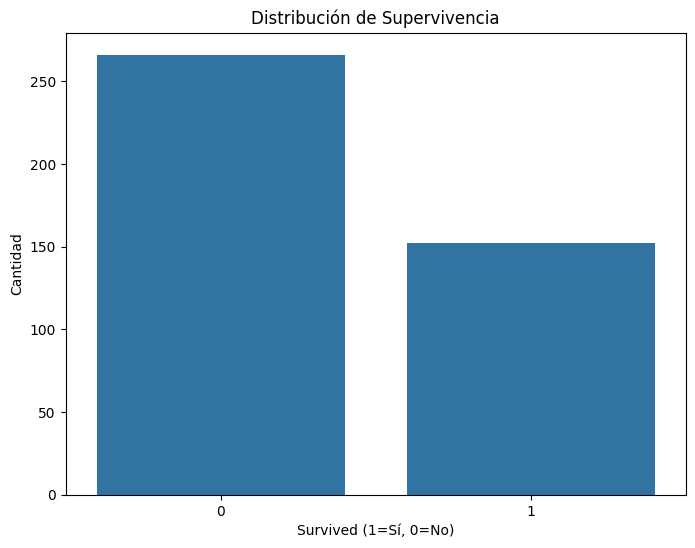

In [2]:
# 1 Distribución de supervivencia
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia')
plt.xlabel('Survived (1=Sí, 0=No)')
plt.ylabel('Cantidad')
plt.savefig('../results/dist_supervivencia.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

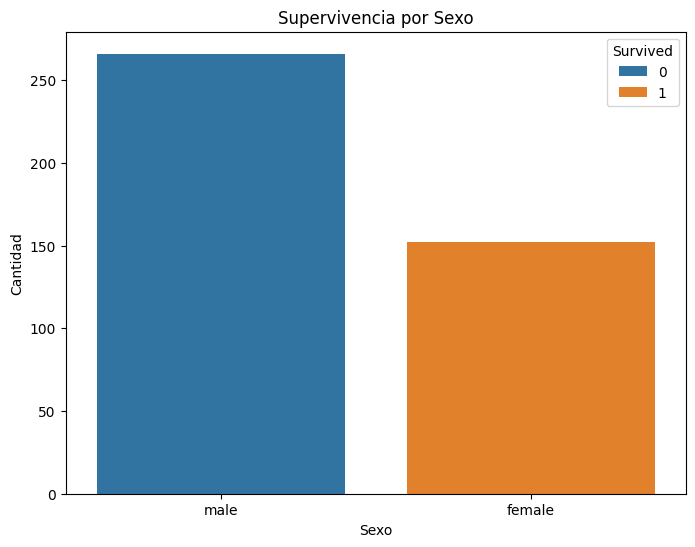

In [3]:
# 2 Supervivencia por sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Survived')
plt.savefig('../results/sup_porSexo.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

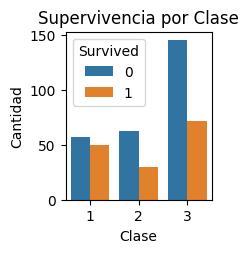

In [4]:
# 3 Supervivencia por clase
plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.savefig('../results/sup_por_clase.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

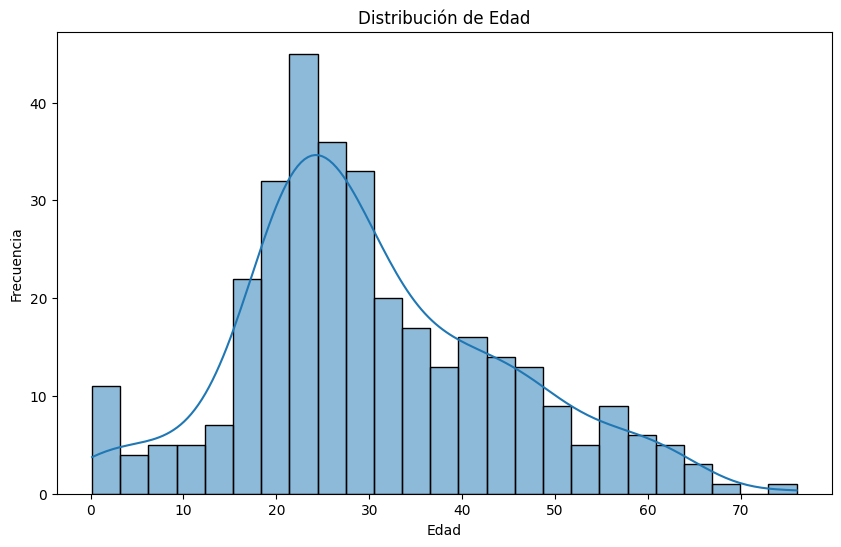

In [5]:
# 4 Distribución de edades 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=25, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('../results/dist_edad.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

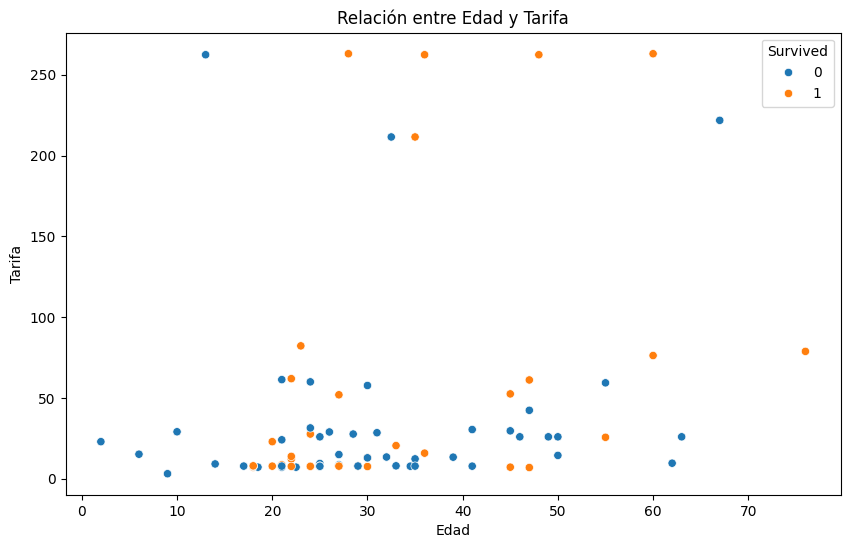

In [6]:
# 5️ Edad vs. Tarifa 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df.head(100))
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.savefig('../results/relacion_edad_tarifa.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

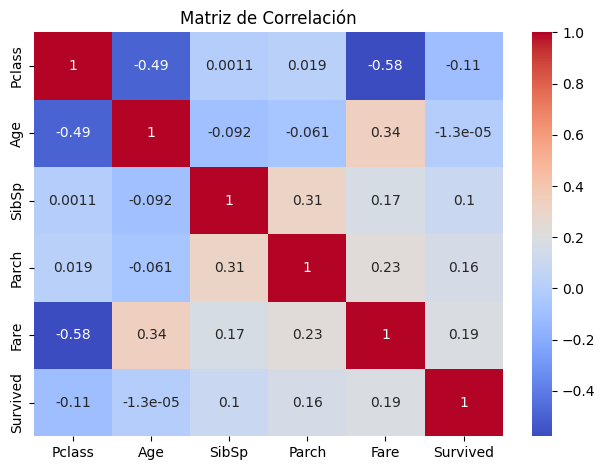

In [7]:
# 6️ Mapa de calor de correlaciones
corr = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('../results/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

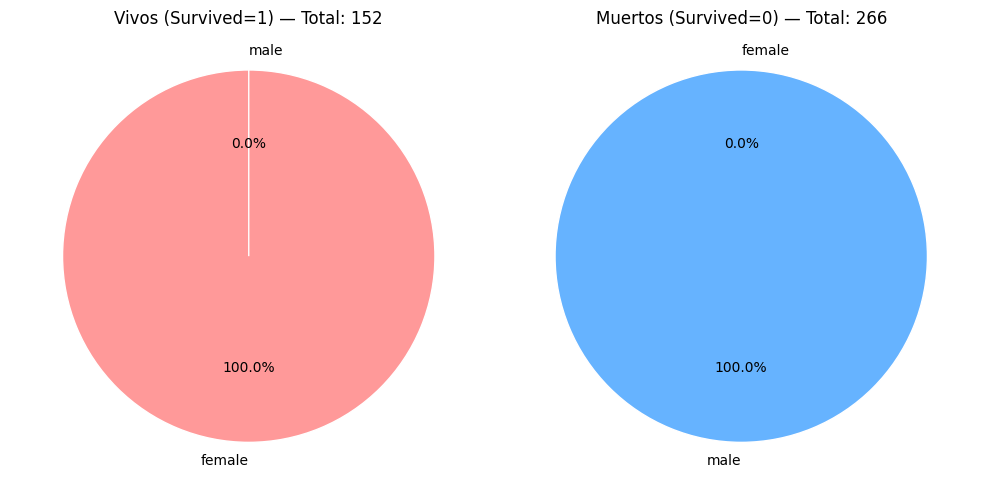

In [8]:
# 7️ Gráficos de pastel de supervivencia por sexo

# Crear dataframes separados
df_vivos = df[df["Survived"] == 1]
df_muertos = df[df["Survived"] == 0]

# Contar por sexo (asegurar orden female, male)
order = ["female", "male"]
counts_vivos = df_vivos["Sex"].value_counts().reindex(order).fillna(0)
counts_muertos = df_muertos["Sex"].value_counts().reindex(order).fillna(0)

# Graficar dos pie charts lado a lado
fig_1, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(counts_vivos, labels=counts_vivos.index, autopct="%1.1f%%", startangle=90,
            colors=["#ff9999", "#66b3ff"], wedgeprops={"edgecolor": "w"})
axes[0].set_title(f"Vivos (Survived=1) — Total: {len(df_vivos)}")
axes[0].axis("equal")

axes[1].pie(counts_muertos, labels=counts_muertos.index, autopct="%1.1f%%", startangle=90,
            colors=["#ff9999", "#66b3ff"], wedgeprops={"edgecolor": "w"})
axes[1].set_title(f"Muertos (Survived=0) — Total: {len(df_muertos)}")
axes[1].axis("equal")

plt.tight_layout()
plt.savefig('../results/pie_supervivencia_por_sexo.png', dpi=300, bbox_inches='tight')
plt.show()


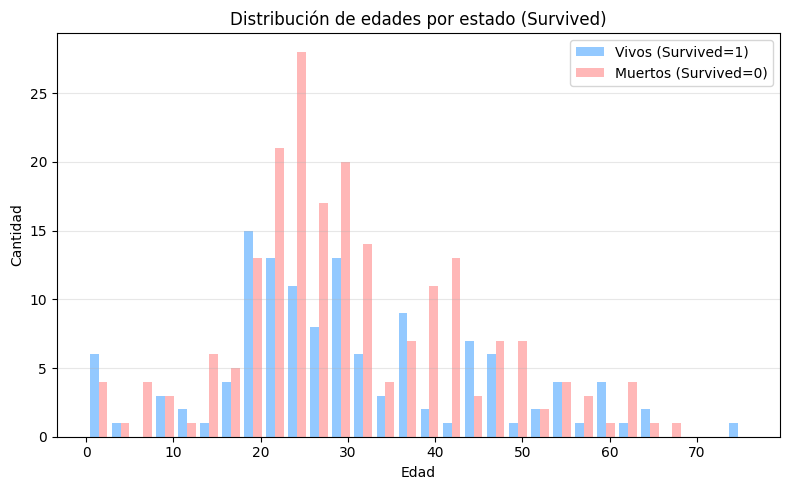

In [ ]:
# 8 Gráficos de pastel de supervivencia por sexo
# Distribución de edades para vivos (Survived=1) y muertos (Survived=0)
ages_vivos = df_vivos["Age"].dropna()
ages_muertos = df_muertos["Age"].dropna()

fig_2, ax = plt.subplots(figsize=(8, 5))

# Usar el mismo histograma para ambas series (bins compartidos)
ax.hist([ages_vivos, ages_muertos],
    bins=30,
    color=["#66b3ff", "#ff9999"],
    alpha=0.7,
    label=["Vivos (Survived=1)", "Muertos (Survived=0)"])

ax.set_xlabel("Edad")
ax.set_ylabel("Cantidad")
ax.set_title("Distribución de edades por estado (Survived)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig('../results/dist_edad_por_estado.png', dpi=300, bbox_inches='tight')
plt.show()